## Modelos de aprendizaje

Mateo Andrés Manosalva Amaris

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

plt.style.use('seaborn-v0_8-dark')

np.random.seed(42)

def train_validation_test_split(X, y, test_size=0.2, val_size=0.25, random_state=42):

     # Dividir dataset en conjunto de entrenamiento + validación y conjunto de test
    X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=test_size, random_state=random_state)
    
    # Dividir conjunto de entrenamiento + validación en conjunto de entrenamiento y conjunto de validación
    X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=val_size/(1-test_size), random_state=random_state)
    
    return X_train, X_val, X_test, y_train, y_val, y_test



class SVM:

    def __init__(self, C = 1.0):
        # C = error term
        self.C = C
        self.w = 0
        self.b = 0

   

     # Hinge Loss Function / Calculation
    def hingeloss(self, w, b, x, y):
        # Regularizer term
        reg = 0.5 * (w * w)

        for i in range(x.shape[0]):
            # Optimization term
            opt_term = y[i] * ((np.dot(w, x[i])) + b)

            # calculating loss
            loss = reg + self.C * max(0, 1-opt_term)
        return loss[0][0]
    
    def accuracy(self,w,b,x,y):
        prediction = np.dot(x, w[0]) + b # w.x + b
        compared=np.sign(prediction)==y
        self.precision=sum(compared)/x.shape[0]
        return self.precision

    def fit(self, X, Y,X_val,y_val, batch_size=100, learning_rate=0.001, epochs=1000,eval_step=10):
        # The number of features in X
        number_of_features = X.shape[1]

        # The number of Samples in X
        number_of_samples = X.shape[0]

        c = self.C

        # Creating ids from 0 to number_of_samples - 1
        ids = np.arange(number_of_samples)

        # Shuffling the samples randomly
        np.random.shuffle(ids)

        # creating an array of zeros
        w = np.zeros((1, number_of_features))
        b = 0
        losses = []
        val_loss=[]

        accuracy=[]
        val_accuracy=[]

        # Gradient Descent logic
        for i in range(epochs):
            if i%eval_step==0:
                # Calculating the Hinge Loss
                l = self.hingeloss(w, b, X, Y)
                vl= self.hingeloss(w,b,X_val,y_val)
                # Appending all losses 
                losses.append(l)
                val_loss.append(vl)

                acc= self.accuracy(w,b,X,Y)
                acc_val= self.accuracy(w,b,X_val,y_val)
                
                # Appending all losses 
                accuracy.append(acc)
                val_accuracy.append(acc_val)



            # Starting from 0 to the number of samples with batch_size as interval
            for batch_initial in range(0, number_of_samples, batch_size):
                gradw = 0
                gradb = 0

                for j in range(batch_initial, batch_initial+ batch_size):
                    if j < number_of_samples:
                        x = ids[j]
                        ti = Y[x] * (np.dot(w, X[x].T) + b)

                        if ti > 1:
                            gradw += 0
                            gradb += 0
                        else:
                            # Calculating the gradients

                            #w.r.t w 
                            gradw += c * Y[x] * X[x]
                            # w.r.t b
                            gradb += c * Y[x]

                # Updating weights and bias
                w = w - learning_rate * w + learning_rate * gradw
                b = b + learning_rate * gradb
        
        self.w = w
        self.b = b
        self.losses = losses
        self.val_loss= val_loss

        self.accuracy= accuracy
        self.val_accuracy= val_accuracy
        print(f'Precisión:{accuracy[-1]}')
        return self.w, self.b

    def predict(self, X):
        
        prediction = np.dot(X, self.w[0]) + self.b # w.x + b
        return np.sign(prediction)
    def plot_loss(self):
        plt.plot(self.losses,linewidth=3,label='Losses')
        plt.plot(self.val_loss, label='val_loss')
        plt.suptitle('Loss vs Epochs')
        plt.xlabel('Epochs')
        plt.ylabel('Loss')
        plt.grid(color='white')
        plt.legend()
        plt.show()
    
    def plot_omega(self):

        fig, axs = plt.subplots(1,3)
        axs[0].plot(self.losses,linewidth=3,label='Losses')
        axs[0].plot(self.val_loss, label='val_loss')
        axs[0].set_title('Loss vs Epochs')
        axs[0].set_xlabel('Epochs')
        axs[0].set_ylabel('Loss')
        axs[0].legend()
        axs[0].grid(color='white')

        omega = np.abs(np.array(self.accuracy) - np.array(self.val_accuracy))

        axs[1].plot(omega,linewidth=3,label='Omega')
    
        axs[1].set_title('$\Omega_{min}$ vs Epochs')
        axs[1].set_xlabel('Epochs')
        axs[1].set_ylabel('$\Omega_{min}$')
        axs[1].grid(color='white')

        axs[2].plot(self.accuracy,linewidth=3,label='Accuracy')
        axs[2].plot(self.val_accuracy, label='Validation accuracy')
        axs[2].set_title('Accuracy vs Epochs')
        axs[2].set_xlabel('Epochs')
        axs[2].set_ylabel('Accuracy')
        axs[2].legend()
        axs[2].grid(color='white')

        fig.tight_layout(pad=0.8)
        fig.set_figwidth(20)
        fig.set_figheight(5)
        plt.grid(color='white')
        plt.show()

    def evaluate_model(self,x, y,show_metrics=True):
        # Hacer la predicción con el modelo
        y_pred = self.predict(x)
        
        # Calcular los valores de verdaderos positivos, verdaderos negativos, falsos positivos y falsos negativos
        tp = 0
        tn = 0
        fp = 0
        fn = 0
        
        for i in range(len(y)):
            if y[i] == 1 and y_pred[i] == 1:
                tp += 1
            elif y[i] == -1 and y_pred[i] == -1:
                tn += 1
            elif y[i] == -1 and y_pred[i] == 1:
                fp += 1
            elif y[i] == 1 and y_pred[i] == -1:
                fn += 1
        print(f"True positives:{tp}")
        print(f"True negatives:{tn}")
        print(f"False positives:{fp}")
        print(f"False negatives:{tp}")

        # Calcular la precisión, el recall y el F1-score
        self.precision = tp / (tp + fp)
        self.recall = tp / (tp + fp)
        self.f1_score = 2 * (self.precision * self.recall) / (self.precision + self.recall)
        
        # Imprimir los resultados
        print("Precisión:", self.precision)
        print("Recall:", self.recall)
        print("F1-score:", self.f1_score) 
        self.confusion_matrix=np.array([[tn,fp],[fn,tp]])


    def plot_confusion_matrix(self):
        # Configuramos la figura y el subplot
        fig, ax = plt.subplots(figsize=(4, 4))
        confusion_matrix=self.confusion_matrix
        # Configuramos el mapa de colores y la escala
        im = ax.imshow(confusion_matrix, cmap='Blues')
        cbar = ax.figure.colorbar(im, ax=ax)

        # Añadimos los títulos y etiquetas de los ejes
        ax.set(xticks=np.arange(confusion_matrix.shape[1]),
            yticks=np.arange(confusion_matrix.shape[0]),
            xticklabels=['Negativo', 'Positivo'], yticklabels=['Negativo', 'Positivo'],
            xlabel='Valor Predicho', ylabel='Valor Real')

        # Rotamos los labels de los ejes para que se lean mejor
        plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
                rotation_mode="anchor")

        # Añadimos los valores de cada celda de la matriz de confusión
        thresh = confusion_matrix.max() / 2.
        for i in range(confusion_matrix.shape[0]):
            for j in range(confusion_matrix.shape[1]):
                ax.text(j, i, format(confusion_matrix[i, j], 'd'),
                        ha="center", va="center",
                        color="white" if confusion_matrix[i, j] > thresh else "black")

        # Ajustamos los márgenes de la figura
        fig.tight_layout()

        # Mostramos el plot
        plt.show()


Luego importamos el dataset banknote authentication con pandas y dividimos con SKLearn los datos de entrenamiento y de test, en este caso se usa una proporción de 80-20

In [4]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split


df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/00267/data_banknote_authentication.txt', header=None)


df.columns = ['variance', 'skewness', 'curtosis', 'entropy', 'class']

df.iloc[:, -1] = df.iloc[:, -1].replace(0, -1)

X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values

# Separación de los datos
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Entrena la SVM
svm = SVM()
svm.fit(X_train, y_train)

y_pred = svm.predict(X_test)

#Evalúa el modelo
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy:', accuracy)

Accuracy: 0.9854545454545455


In [13]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.utils import shuffle
np.random.seed(42)
import matplotlib.pyplot as plt
import seaborn as sns

In [14]:
df=shuffle(df)

Nos arroja una exactitud del 98% aproximadamente, lo que nos permitiría afirmar que nuestro modelo se comporta muy bien y sugiere que los datos en efecto son separables linealmente.

## Ahora con el dataset Occupancy_data

Para este caso los datasets de test y training ya están separados, por tanto primero importaremos el data set training y entrenaremos la SVM en este paso, se hace necesario eliminar la columna "date" ya que al no ser un entero genera fallos al calcular $$w\cdot x+b$$

In [26]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split


df = pd.read_csv('datatraining.txt')

df.columns = ['date','Temperature','Humidity','Light','CO2','HumidityRatio','Occupancy']

df = df.drop('date', axis=1)

df.iloc[:, -1] = df.iloc[:, -1].replace(0, -1)

X_train = df.iloc[:, :-1].values
y_train = df.iloc[:, -1].values

# Entrena la SVM
svm = SVM()
svm.fit(X_train, y_train)


(array([[-9.83183029e+01, -8.23239866e+01,  3.06406792e+01,
          1.73685080e+00, -1.19912037e-02]]),
 -395.60299999988507,
 [1.0,
  1464.249911874382,
  235.46067322388228,
  455.0010984457841,
  723.4162462786389,
  1221.1068148237407,
  1308.9205011416352,
  1607.3392143760245,
  1924.5781750629997,
  4024.3543171580654,
  2406.4807467838295,
  2650.876971489093,
  3152.401913567856,
  3102.808056080346,
  3585.5756283836295,
  3492.773958584505,
  3702.009209370621,
  3848.382816148228,
  4009.405098337483,
  4549.497091498484,
  4229.876665946885,
  4319.563793356294,
  4421.495601814251,
  4528.653180394039,
  4575.874806226462,
  4667.757511098342,
  4684.274316944735,
  4938.143136313799,
  4663.70696474785,
  4710.263897460786,
  4738.721170008621,
  4772.619416345627,
  4957.308843122973,
  4949.327689116766,
  4959.493521721722,
  4963.979520694887,
  4887.656137867468,
  4933.308311943864,
  4966.258642575734,
  5026.26594943858,
  5011.532518593254,
  5060.354658308584

Ahora importamos el dataset datatest, aquí dividimos etiquetas y características a mano ya que SKLearn no nos permite coger toda la base de datos para test, siempre pide una proporción en test_size, por ello aquí y también en la celda de código anterior tomamos los valores de la última columna como los y_i y los demás como x_i, quitando la fecha.

In [27]:
df = pd.read_csv('datatest.txt')

df.columns = ['date','Temperature','Humidity','Light','CO2','HumidityRatio','Occupancy']

df = df.drop('date', axis=1)

df.iloc[:, -1] = df.iloc[:, -1].replace(0, -1)

X_test1 = df.iloc[:, :-1].values
y_test1 = df.iloc[:, -1].values

Evaluamos sobre los datos

In [28]:
y_pred = svm.predict(X_test1)

#Evalúa el modelo
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test1, y_pred)
print('Accuracy:', accuracy)

Accuracy: 0.9711069418386492


Y obtenemos exactitud del 97%, veamos ahora el datatest2:

In [29]:
df = pd.read_csv('datatest2.txt')

df.columns = ['date','Temperature','Humidity','Light','CO2','HumidityRatio','Occupancy']

df = df.drop('date', axis=1)

df.iloc[:, -1] = df.iloc[:, -1].replace(0, -1)

X_test2 = df.iloc[:, :-1].values
y_test2 = df.iloc[:, -1].values

In [30]:
y_pred = svm.predict(X_test2)

#Evalúa el modelo
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test2, y_pred)
print('Accuracy:', accuracy)

Accuracy: 0.9441140278917145


* Parece que el tamaño de los dataset es suficiente y la prueba de ellos es que la exactitud con la que está funcionando el modelo sobre los datos no observados el bastante alta.

# Show some examples to illustrate that the method is working properly.

## Veamos ahora con los métodos aprendidos en clase que el modelo funciona bien para ambos data set

In [17]:

df_bank_note = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/00267/data_banknote_authentication.txt', header=None)

df_bank_note.columns = ['variance', 'skewness', 'curtosis', 'entropy', 'class']

In [18]:
df_bank_note['class']=df_bank_note['class'].replace(0,-1)

In [19]:
df_bank_note

,variance,skewness,curtosis,entropy,class
0,3.62160,8.66610,-2.8073,-0.44699,-1
1,4.54590,8.16740,-2.4586,-1.46210,-1
2,3.86600,-2.63830,1.9242,0.10645,-1
3,3.45660,9.52280,-4.0112,-3.59440,-1
4,0.32924,-4.45520,4.5718,-0.98880,-1
...,...,...,...,...,...
1367,0.40614,1.34920,-1.4501,-0.55949,1
1368,-1.38870,-4.87730,6.4774,0.34179,1
1369,-3.75030,-13.45860,17.5932,-2.77710,1
1370,-3.56370,-8.38270,12.3930,-1.28230,1


In [20]:
df_bank_note=shuffle(df_bank_note)

In [21]:
df_bank_note['class']

1000    1
1097    1
735    -1
942     1
73     -1
       ..
710    -1
1039    1
777     1
1311    1
46     -1
Name: class, Length: 1372, dtype: int64

In [22]:
sum(df_bank_note['class']==0)

0

In [23]:
sum(df_bank_note['class']==1)

610

In [24]:
df_bank_note.describe()

,variance,skewness,curtosis,entropy,class
count,1372.000000,1372.000000,1372.000000,1372.000000,1372.000000
mean,0.433735,1.922353,1.397627,-1.191657,-0.110787
std,2.842763,5.869047,4.310030,2.101013,0.994207
min,-7.042100,-13.773100,-5.286100,-8.548200,-1.000000
25%,-1.773000,-1.708200,-1.574975,-2.413450,-1.000000
50%,0.496180,2.319650,0.616630,-0.586650,-1.000000
75%,2.821475,6.814625,3.179250,0.394810,1.000000
max,6.824800,12.951600,17.927400,2.449500,1.000000


# ¿Los datos son linealmente separables?

Text(0.5, 0.98, 'Marginal plot and distributions')

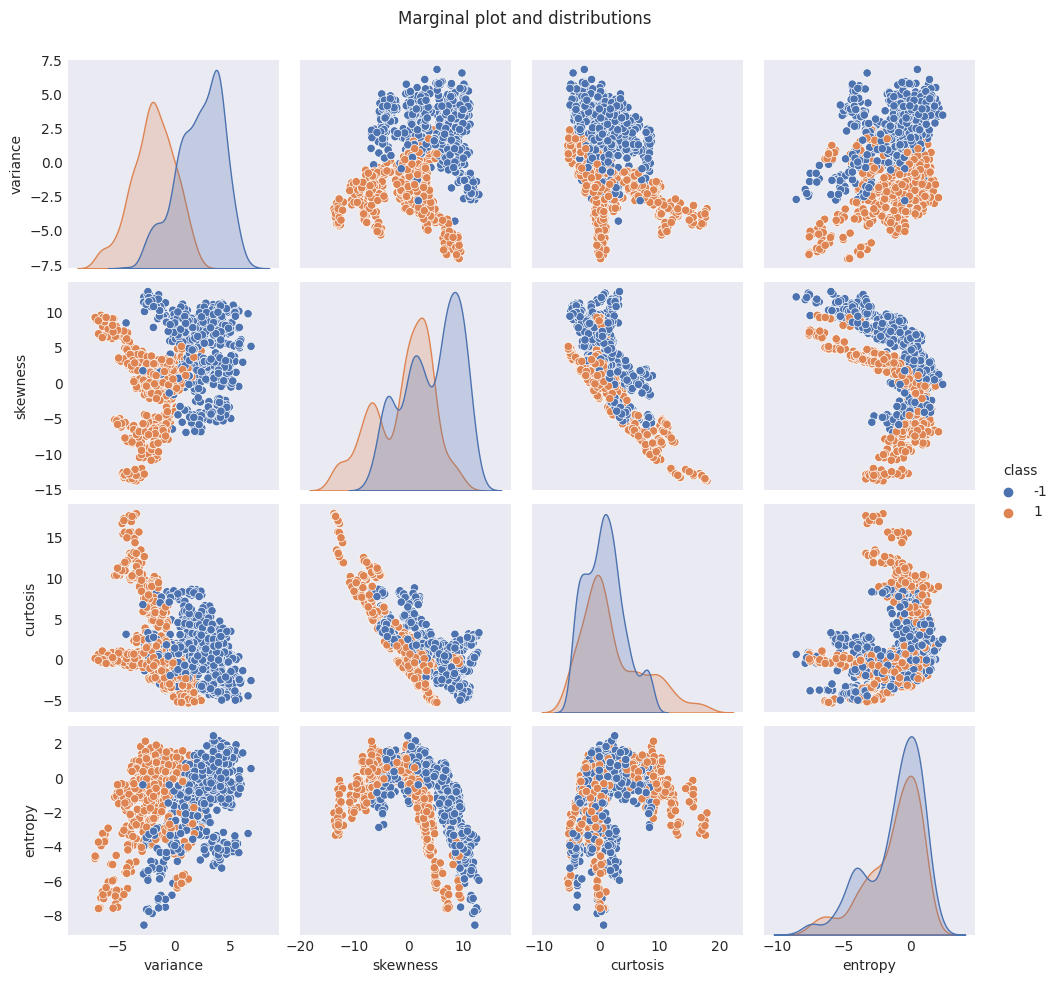

In [25]:
pair=sns.pairplot(df_bank_note, hue="class",palette='deep')
pair.fig.subplots_adjust(top=.93)
pair.fig.suptitle('Marginal plot and distributions')

Podemos ver también la matriz de correlación:

<Axes: title={'center': 'Correlation Matrix'}>

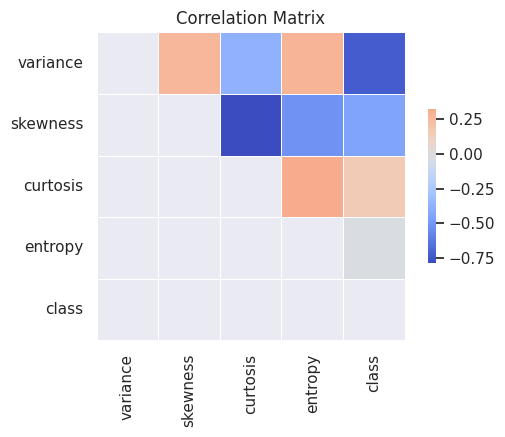

In [26]:
sns.set_theme(style="dark")
corr = df_bank_note.corr()
mask = np.triu(np.ones_like(corr, dtype=bool)).T
f, ax = plt.subplots(figsize=(6,4))
ax.set_title("Correlation Matrix")
# Generate a custom diverging colormap
# cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, center=0,cmap='coolwarm',
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

In [27]:
X =df_bank_note.drop('class',axis=1).values
y= df_bank_note['class'].values

# Scale the features using MinMaxScaler
scaler = MinMaxScaler()
X = scaler.fit_transform(X)

# Split the dataset into training and testing sets
X_train, X_val, X_test, y_train, y_val, y_test= train_validation_test_split(X, y)

In [28]:
clf = LogisticRegression(tol=0,max_iter=10000)
clf.fit(X,y)

LogisticRegression(max_iter=10000, tol=0)

In [29]:
clf.score(X,y)

0.9715743440233237

Con regresión logística comprobamos que nuestros datos son linealmente separables

 ## DIMENSIÓN VC

In [31]:
X_train.shape

(754, 4)

El tamaño de la muestra es de $754$ y la dimensión de cada observación es de $4$. La dimensión VC de una máquina de vectores de soporte es $d+1$, en este caso es $5$, luego como $10d_{vc}(\mathcal{H})=50$, entonces el modelo puede generalizar ya que $50\leq N$.Esta es la verdadera garantía de generalización.

### Ejemplos de funcionamiento del modelo:

In [44]:
svm=SVM()

In [45]:
svm.fit(X_train, y_train,X_val,y_val,learning_rate=0.001,epochs=50,eval_step=5);


Precisión:0.8222811671087533


In [46]:
def svm_model(data):
    X=data.drop('class',axis=1).values
    X=scaler.transform(X)
    return svm.predict(X)

In [57]:
example_data=df_bank_note[750:760]
example_data

,variance,skewness,curtosis,entropy,class
1291,0.52374,3.6440,-4.07460,-1.99090,1
488,1.13150,7.9212,1.09300,-2.84440,-1
1089,-2.98210,4.1986,-0.58980,-3.96420,1
1046,0.88992,2.2638,-3.10460,-0.11855,1
759,0.01727,8.6930,1.39890,-3.96680,-1
1357,-2.58990,-0.3911,0.93452,0.42972,1
88,4.11970,-2.7956,2.07070,0.67412,-1
680,3.44650,2.9508,1.02710,0.54610,-1
901,-1.54490,-10.1498,9.61520,-1.23320,1
1285,0.29520,4.8856,-5.14900,-6.23230,1


In [58]:
example_data['Prediction']=svm_model(example_data)

/tmp/ipykernel_35548/3269350731.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  example_data['Prediction']=svm_model(example_data)


In [59]:
example_data

,variance,skewness,curtosis,entropy,class,Prediction
1291,0.52374,3.6440,-4.07460,-1.99090,1,-1.0
488,1.13150,7.9212,1.09300,-2.84440,-1,-1.0
1089,-2.98210,4.1986,-0.58980,-3.96420,1,1.0
1046,0.88992,2.2638,-3.10460,-0.11855,1,-1.0
759,0.01727,8.6930,1.39890,-3.96680,-1,-1.0
1357,-2.58990,-0.3911,0.93452,0.42972,1,1.0
88,4.11970,-2.7956,2.07070,0.67412,-1,-1.0
680,3.44650,2.9508,1.02710,0.54610,-1,-1.0
901,-1.54490,-10.1498,9.61520,-1.23320,1,1.0
1285,0.29520,4.8856,-5.14900,-6.23230,1,-1.0


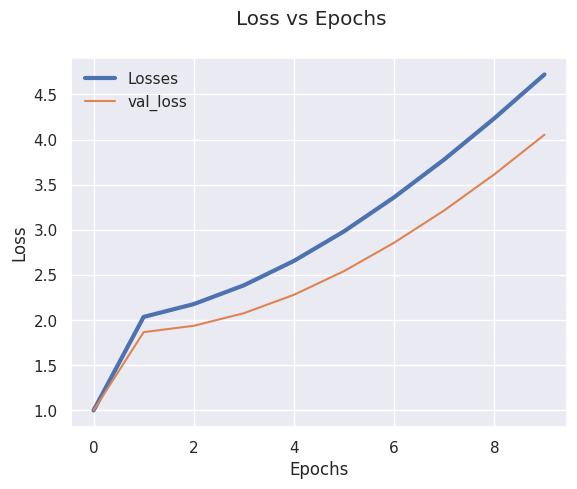

In [60]:
svm.plot_loss()


### Evidencia cuantitativa de generalización:

In [61]:
svm.evaluate_model(X_test,y_test)

True positives:93
True negatives:138
False positives:1
False negatives:93
Precisión: 0.9893617021276596
Recall: 0.9893617021276596
F1-score: 0.9893617021276596


En este punto lo que nos queda es hacer lo mismo para el segundo dataset

In [62]:
# Load the dataset
df_occupancy = pd.read_csv('occupancy_data/datatraining.txt')

df_occupancy.head()

,date,Temperature,Humidity,Light,CO2,HumidityRatio,Occupancy
1,2015-02-04 17:51:00,23.18,27.2720,426.0,721.25,0.004793,1
2,2015-02-04 17:51:59,23.15,27.2675,429.5,714.00,0.004783,1
3,2015-02-04 17:53:00,23.15,27.2450,426.0,713.50,0.004779,1
4,2015-02-04 17:54:00,23.15,27.2000,426.0,708.25,0.004772,1
5,2015-02-04 17:55:00,23.10,27.2000,426.0,704.50,0.004757,1


In [63]:
df_val_occupancy = pd.read_csv('occupancy_data/datatest.txt')
df_test_occupancy = pd.read_csv('occupancy_data/datatest2.txt')

In [64]:
df_val_occupancy

,date,Temperature,Humidity,Light,CO2,HumidityRatio,Occupancy
140,2015-02-02 14:19:00,23.700000,26.272000,585.200000,749.200000,0.004764,1
141,2015-02-02 14:19:59,23.718000,26.290000,578.400000,760.400000,0.004773,1
142,2015-02-02 14:21:00,23.730000,26.230000,572.666667,769.666667,0.004765,1
143,2015-02-02 14:22:00,23.722500,26.125000,493.750000,774.750000,0.004744,1
144,2015-02-02 14:23:00,23.754000,26.200000,488.600000,779.000000,0.004767,1
...,...,...,...,...,...,...,...
2800,2015-02-04 10:38:59,24.290000,25.700000,808.000000,1150.250000,0.004829,1
2801,2015-02-04 10:40:00,24.330000,25.736000,809.800000,1129.200000,0.004848,1
2802,2015-02-04 10:40:59,24.330000,25.700000,817.000000,1125.800000,0.004841,1
2803,2015-02-04 10:41:59,24.356667,25.700000,813.000000,1123.000000,0.004849,1


In [65]:
df_occupancy['Occupancy']=df_occupancy['Occupancy'].replace(0,-1)
df_val_occupancy['Occupancy']=df_val_occupancy['Occupancy'].replace(0,-1)
df_test_occupancy['Occupancy']= df_test_occupancy['Occupancy'].replace(0,-1)

In [66]:
shuffle(df_test_occupancy)

,date,Temperature,Humidity,Light,CO2,HumidityRatio,Occupancy
7808,2015-02-17 00:55:00,20.1000,30.290000,0.0,717.333333,0.004407,-1
4489,2015-02-14 17:36:00,20.0000,35.500000,0.0,516.000000,0.005139,-1
1890,2015-02-12 22:17:00,21.0000,27.067500,0.0,559.750000,0.004161,-1
7306,2015-02-16 16:33:00,21.7675,29.722500,429.0,936.500000,0.004794,1
9407,2015-02-18 03:34:00,20.7900,26.390000,0.0,1354.000000,0.004004,-1
...,...,...,...,...,...,...,...
6997,2015-02-16 11:23:59,21.5000,28.242500,454.0,1010.000000,0.004479,1
1917,2015-02-12 22:44:00,21.0000,26.745000,0.0,564.000000,0.004111,-1
7971,2015-02-17 03:38:00,20.0000,30.500000,0.0,724.000000,0.004410,-1
9698,2015-02-18 08:25:00,20.7900,27.100000,14.0,1437.750000,0.004112,-1


In [67]:
df_occupancy['date'] = pd.to_datetime(df_occupancy['date'])
df_val_occupancy['date'] =pd.to_datetime(df_val_occupancy['date'] )
df_test_occupancy['date']= pd.to_datetime(df_test_occupancy['date'])
reference_date = pd.to_datetime('2015-02-04')
df_occupancy['date_seconds'] = (df_occupancy['date'] - reference_date).dt.total_seconds()

In [68]:
df_val_occupancy['date_seconds']=(df_val_occupancy['date'] - reference_date).dt.total_seconds()

df_test_occupancy['date_seconds']=(df_test_occupancy['date'] - reference_date).dt.total_seconds()

columns = df_occupancy.columns.tolist()

columns = columns[-1:] +columns[:-1]

df_occupancy = df_occupancy[columns]
df_val_occupancy=df_val_occupancy[columns]
df_test_occupancy=df_test_occupancy[columns]

In [69]:
df_val_occupancy['date_seconds']-=df_occupancy['date_seconds'][1]
df_val_occupancy=df_val_occupancy.drop('date',axis=1)

df_occupancy['date_seconds']-=df_occupancy['date_seconds'][1]
df_occupancy=df_occupancy.drop('date',axis=1)

df_test_occupancy['date_seconds']-=df_occupancy['date_seconds'][1]
df_test_occupancy=df_test_occupancy.drop('date',axis=1)

In [70]:
df_occupancy.head()

,date_seconds,Temperature,Humidity,Light,CO2,HumidityRatio,Occupancy
1,0.0,23.18,27.2720,426.0,721.25,0.004793,1
2,59.0,23.15,27.2675,429.5,714.00,0.004783,1
3,120.0,23.15,27.2450,426.0,713.50,0.004779,1
4,180.0,23.15,27.2000,426.0,708.25,0.004772,1
5,240.0,23.10,27.2000,426.0,704.50,0.004757,1


In [71]:
j=1
for i in df_occupancy.columns:
    print(str(j)+'. ' + i)
    j+=1

1. date_seconds
2. Temperature
3. Humidity
4. Light
5. CO2
6. HumidityRatio
7. Occupancy


### ¿Los datos son linealmente separables?

Text(0.5, 0.98, 'Marginal plot and distributions')

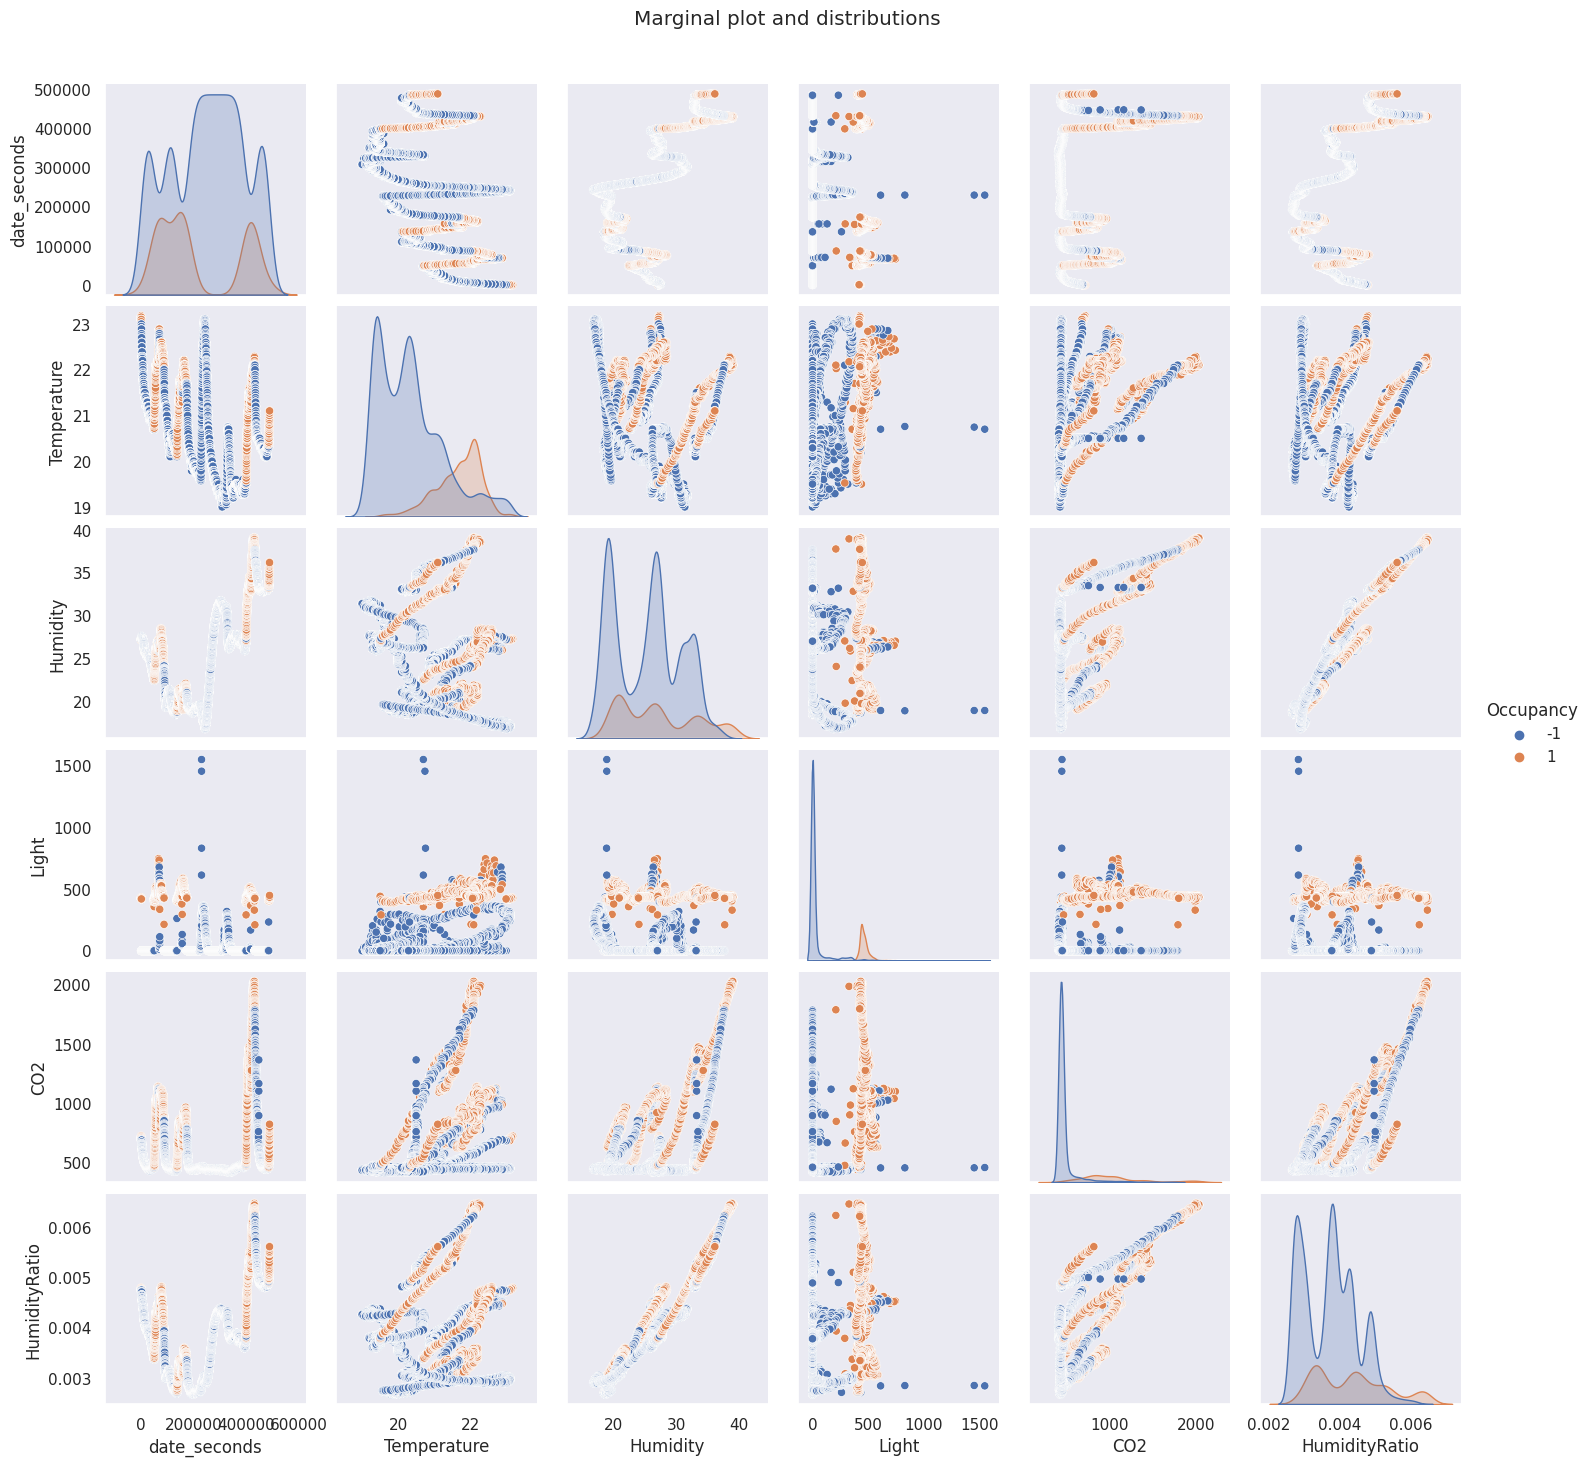

In [72]:
# Visualizing data
sns.set_theme(style="dark")
pair=sns.pairplot(df_occupancy, hue="Occupancy",palette='deep')
pair.fig.subplots_adjust(top=.93)
pair.fig.suptitle('Marginal plot and distributions')

<Axes: title={'center': 'Correlation Matrix'}>

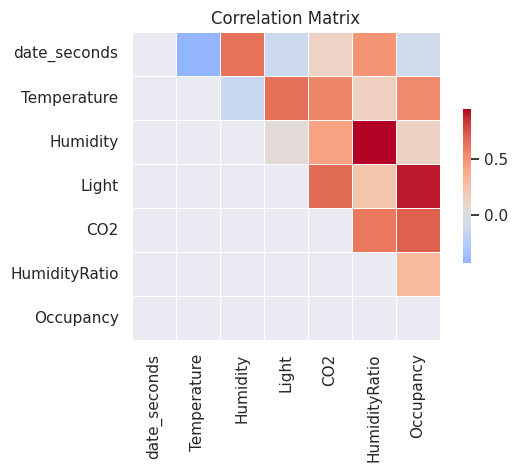

In [75]:
sns.set_theme(style="dark")
corr = df_occupancy.corr()
mask = np.triu(np.ones_like(corr, dtype=bool)).T
f, ax = plt.subplots(figsize=(6,4))
ax.set_title("Correlation Matrix")
# Generate a custom diverging colormap
# cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, center=0,cmap='coolwarm',
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

In [76]:
X =df_occupancy.drop('Occupancy',axis=1).values
y= df_occupancy['Occupancy'].values

# Scale the features using MinMaxScaler
scaler = MinMaxScaler()
X = scaler.fit_transform(X)

# Split the dataset into training and testing sets
X_train, y_train= X,y
X_val, y_val = scaler.transform(df_val_occupancy.drop('Occupancy',axis=1).values),df_val_occupancy['Occupancy'].values
X_test, y_test = scaler.transform(df_test_occupancy.drop('Occupancy',axis=1).values),df_test_occupancy['Occupancy'].values


In [77]:
shuffle(df_test_occupancy['Occupancy'].values)

array([-1, -1, -1, ..., -1, -1, -1])

In [78]:
clf = LogisticRegression(tol=0,max_iter=10000)
clf.fit(X,y)

LogisticRegression(max_iter=10000, tol=0)

In [79]:
clf.score(X,y)

0.9856318310205084

La regresión logística nuevamente prueba que los datos son linealmente separables, el error es mínimo, pero esto no basta, nuevamente es necesaria verificar la dimensión VC, y observar datos cuantitativos para garantizar generalización.

### Evidencia cuantitativa

In [80]:
df_occupancy.shape

(8143, 7)

En este caso también podemos garantizar generalización ya que la dimensión VC en este caso es 10*(7+1)=80, luego podemos garantizar generalización porque $80\leq N$

In [82]:
svm = SVM()

In [83]:
svm.fit(X_train, y_train,X_val,y_val,learning_rate=0.001,epochs=100)


Precisión:0.9706496377256539


(array([[-0.41276298,  0.06489483, -0.02523273,  3.54966671,  2.26733864,
          0.05864408]]),
 -1.0979999999999934)

In [84]:
def svm_model(data):
    X=data.drop('Occupancy',axis=1).values
    X=scaler.transform(X)
    return svm.predict(X)

In [85]:
example_data=shuffle(df_occupancy)[:10]
example_data

,date_seconds,Temperature,Humidity,Light,CO2,HumidityRatio,Occupancy
1843,110520.0,20.10,21.000000,0.000000,444.50,0.003048,-1
3293,197519.0,20.00,18.700000,0.000000,434.00,0.002696,-1
7316,438900.0,20.70,35.290000,0.000000,1060.00,0.005336,-1
2943,176520.0,20.89,19.790000,0.000000,592.00,0.003016,-1
5733,343920.0,19.39,27.200000,7.000000,425.50,0.003783,-1
339,20280.0,21.20,25.390000,0.000000,463.00,0.003950,-1
84,4980.0,22.15,27.245000,0.000000,586.50,0.004496,-1
1152,69059.0,22.89,26.133333,590.333333,1002.00,0.004511,-1
5246,314700.0,19.29,31.000000,7.000000,432.75,0.004288,-1
925,55440.0,21.89,25.200000,497.000000,895.75,0.004090,1


In [86]:
example_data['Prediction']=svm_model(example_data)

In [87]:
example_data

,date_seconds,Temperature,Humidity,Light,CO2,HumidityRatio,Occupancy,Prediction
1843,110520.0,20.10,21.000000,0.000000,444.50,0.003048,-1,-1.0
3293,197519.0,20.00,18.700000,0.000000,434.00,0.002696,-1,-1.0
7316,438900.0,20.70,35.290000,0.000000,1060.00,0.005336,-1,-1.0
2943,176520.0,20.89,19.790000,0.000000,592.00,0.003016,-1,-1.0
5733,343920.0,19.39,27.200000,7.000000,425.50,0.003783,-1,-1.0
339,20280.0,21.20,25.390000,0.000000,463.00,0.003950,-1,-1.0
84,4980.0,22.15,27.245000,0.000000,586.50,0.004496,-1,-1.0
1152,69059.0,22.89,26.133333,590.333333,1002.00,0.004511,-1,1.0
5246,314700.0,19.29,31.000000,7.000000,432.75,0.004288,-1,-1.0
925,55440.0,21.89,25.200000,497.000000,895.75,0.004090,1,1.0


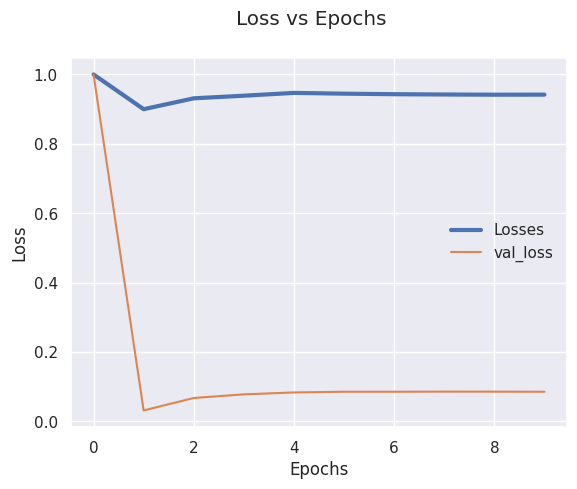

In [88]:
svm.plot_loss()


In [89]:
svm.evaluate_model(X_test,y_test)

True positives:751
True negatives:7677
False positives:26
False negatives:751
Precisión: 0.9665379665379665
Recall: 0.9665379665379665
F1-score: 0.9665379665379665
